# Project - Bank Churn Analysis - version v001

---

In this first notebook we will only present the data. We will do a descriptive analysis and create some assumptions about why customers leave.

## First Step - Data Manipulation and Data Cleaning.

In [293]:
import pandas as pds

UserPath = r"/content/drive/"
FilePath = r"MyDrive/Dados/"
FileName = r"bankchurndata.csv"

In [294]:
BankData = pds.read_csv(f"{UserPath}{FilePath}{FileName}")
display(BankData.head()) # Data visualization.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Questions:**

1.   Are all variables important for the analysis?
2.   How many customers we have in our sample?
3.   Do we have some missing data in our sample?
4.   Are all variables correctly formed?

In [295]:
# We don't need the RowNumber variable.
BankData = BankData.drop(columns="RowNumber")

In [296]:
# How many customers we have in our sample?
NumCustomers = BankData['CustomerId'].nunique()
print(f"We have {NumCustomers:,} customers in our sample.")

We have 10,000 customers in our sample.


In [297]:
# Do we have some missing data in our sample?
NumMissing = BankData.isna().sum().sum()
print(f"We have {NumMissing:,} missing data in our sample.")

We have 0 missing data in our sample.


In [298]:
# Are all variables correctly formed?
print(BankData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


In [299]:
# All variables are correctly formed now.
BankData = BankData.set_index("CustomerId")
BankData["HasCrCard"] = BankData["HasCrCard"].astype('category')
BankData["IsActiveMember"] = BankData["IsActiveMember"].astype('category')
BankData["Exited"] = BankData["Exited"].astype('category')
print(BankData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  object  
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  object  
 3   Gender           10000 non-null  object  
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 810.9+ KB
None


## Second Step - Univariate Descriptive Data Analysis

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

**Questions:**

1.   What are the distributions of the variables in our sample?
2.   Do we have some outliers in our sample?
3.   What is the impact of these outliers?
4.   How many people are left?

### Continuous variables

In [301]:
# Let's see the behavior of continuous variables.
ContinuosVariables = ["Balance", "EstimatedSalary"]
display(BankData[ContinuosVariables].describe().round(2))

,Balance,EstimatedSalary
count,10000.00,10000.00
mean,76485.89,100090.24
std,62397.41,57510.49
min,0.00,11.58
25%,0.00,51002.11
50%,97198.54,100193.92
75%,127644.24,149388.25
max,250898.09,199992.48


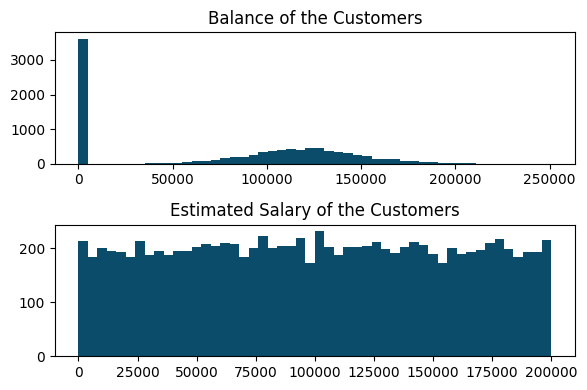

In [302]:
# For continuous variables we will use histogram chart.
colors = ["#0a4c6a"] # Urban Style Guide Colors
plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title("Balance of the Customers")
plt.hist(BankData["Balance"], bins=50, color=colors)
plt.subplot(2,1,2)
plt.title("Estimated Salary of the Customers")
plt.hist(BankData["EstimatedSalary"], bins=50, color=colors)
plt.tight_layout()
plt.show()

In [303]:
# The impact of these outliers.
MeanWithOutliers = BankData["Balance"].mean().round(2)
MeanWithoutOutliers = BankData[BankData["Balance"] != 0]["Balance"].mean().round(2)
DiffrenceMeans = round(MeanWithoutOutliers - MeanWithOutliers, 2)
print(f"The mean of the balance sample with outliers is {MeanWithOutliers:,}.")
print(f"The mean of the balance sample without outliers is {MeanWithoutOutliers:,}.")
print(f"The difference between the means is {DiffrenceMeans:,}.")

The mean of the balance sample with outliers is 76,485.89.
The mean of the balance sample without outliers is 119,827.49.
The difference between the means is 43,341.6.


### Discreet variables

In [304]:
# Let's see the behavior of discreet variables.
DiscreetVariables = ["CreditScore", "Age", "Tenure", "NumOfProducts"]
display(BankData[DiscreetVariables].describe().round(2))

,CreditScore,Age,Tenure,NumOfProducts
count,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,1.53
std,96.65,10.49,2.89,0.58
min,350.00,18.00,0.00,1.00
25%,584.00,32.00,3.00,1.00
50%,652.00,37.00,5.00,1.00
75%,718.00,44.00,7.00,2.00
max,850.00,92.00,10.00,4.00


In [305]:
# The impact of these outliers.
MeanWithOutliers = BankData["CreditScore"].mean().round(2)
MeanWithoutOutliers = BankData[BankData["CreditScore"] != 850]["CreditScore"].mean().round(2)
DiffrenceMeans = round(MeanWithoutOutliers - MeanWithOutliers, 2)
print(f"The mean of the Credit Score sample with outliers is {MeanWithOutliers:,}.")
print(f"The mean of the Credit Score sample without outliers is {MeanWithoutOutliers:,}.")
print(f"The difference between the means is {DiffrenceMeans:,}.")

The mean of the Credit Score sample with outliers is 650.53.
The mean of the Credit Score sample without outliers is 645.77.
The difference between the means is -4.76.


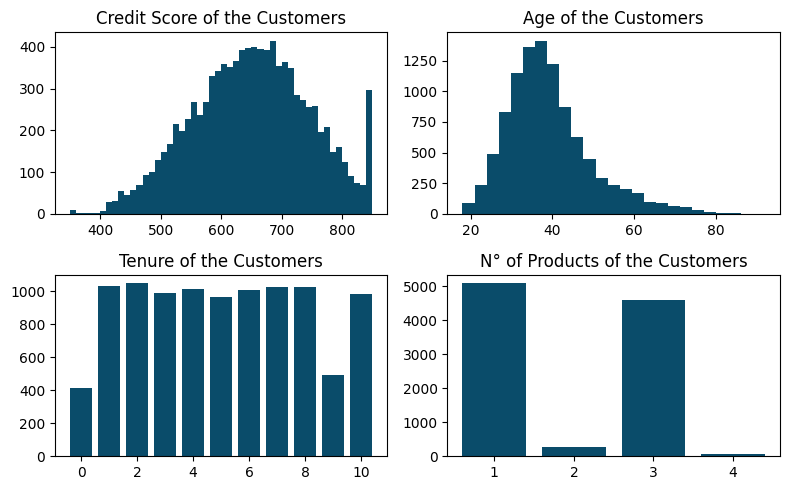

In [306]:
# For discreet variables we will use bar and histogram charts.
colors = ["#0a4c6a"] # Urban Style Guide Colors
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
plt.title("Credit Score of the Customers")
plt.hist(BankData["CreditScore"], bins=50, color=colors)
plt.subplot(2,2,2)
plt.title("Age of the Customers")
plt.hist(BankData["Age"], bins=25, color=colors)
plt.subplot(2,2,3)
plt.title("Tenure of the Customers")
plt.bar(BankData["Tenure"].unique(), BankData["Tenure"].value_counts(), color=colors)
plt.subplot(2,2,4)
plt.title("N° of Products of the Customers")
plt.bar(BankData["NumOfProducts"].unique(), BankData["NumOfProducts"].value_counts(), color=colors)
plt.tight_layout()
plt.show()

### Categorical variables

In [307]:
CategoricalVariable = ["HasCrCard", "IsActiveMember", "Exited"]
display(BankData[CategoricalVariable].describe(include="category"))

,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000
unique,2,2,2
top,1,1,0
freq,7055,5151,7963


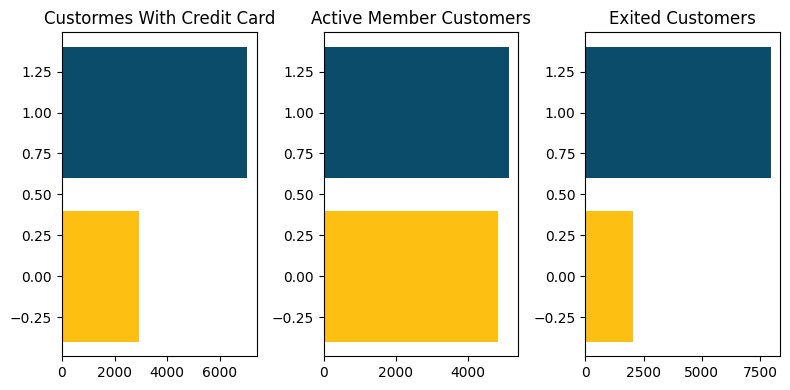

In [308]:
# For categorical variables we will use horizontal bar charts.
colors = ["#0a4c6a", "#fdbf11"] # Urban Style Guide Colors
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.title("Custormes With Credit Card")
plt.barh(BankData["HasCrCard"].unique(), BankData["HasCrCard"].value_counts(), color=colors)
plt.subplot(1,3,2)
plt.title("Active Member Customers")
plt.barh(BankData["IsActiveMember"].unique(), BankData["IsActiveMember"].value_counts(), color=colors)
plt.subplot(1,3,3)
plt.title("Exited Customers")
plt.barh(BankData["Exited"].unique(), BankData["Exited"].value_counts(), color=colors)
plt.tight_layout()
plt.show()

In [319]:
# How many people left?
print(BankData["Exited"].value_counts(normalize=False))
print(BankData["Exited"].value_counts(normalize=True))

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


### Qualitative variables

In [309]:
# Let's see the behavior of qualitative variables.
QualitativeVariable = ["Geography", "Gender"]
display(BankData[QualitativeVariable].describe(include="object"))

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [310]:
# What are the countries in our sample?
print(BankData["Geography"].unique())

['France' 'Spain' 'Germany']


In [311]:
# Extracting countries map file.
Countries = gpd.read_file("/content/drive/MyDrive/Dados/countries/countries.shp")
Countries = Countries[(Countries['NAME'] == 'Spain') |
                      (Countries['NAME'] == 'Germany') |
                      (Countries['NAME'] == 'France')]

In [312]:
# Grouping data with count values.
Counts = BankData['Geography'].value_counts().reset_index()
Counts.columns = ['NAME', 'Count']
Countries = Countries.merge(Counts, on='NAME', how='left')

In [320]:
Counts

,NAME,Count
0,France,5014
1,Germany,2509
2,Spain,2477


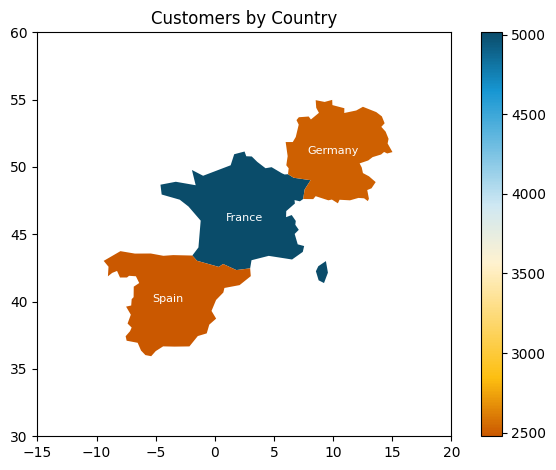

In [313]:
# For qualitative variables we will use custom charts.
colors = ['#ca5800', '#fdbf11', '#fdd870', '#fff2cf', # Urban Style Guide Colors Yellow
          '#cfe8f3', '#73bfe2', '#1696d2', '#0a4c6a'] # Urban Style Guide Colors Blue
cmap = LinearSegmentedColormap.from_list("Urban", colors)
ax = Countries.plot(column='Count', cmap=cmap, legend=True)
plt.title("Customers by Country")
plt.xlim(-15, 20)
plt.ylim(30, 60)
ax.text(-4, 40, "Spain", fontsize=8, ha='center', color='white')
ax.text(2.5, 46, "France", fontsize=8, ha='center', color='white')
ax.text(10, 51, "Germany", fontsize=8, ha='center', color='white')
plt.tight_layout()
plt.show()

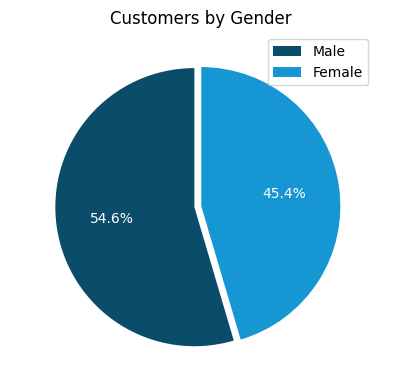

In [314]:
# For qualitative variables we will use custom charts.
colors = ["#0a4c6a", "#1696d2"] # Urban Style Guide
plt.figure(figsize=(6,4))
plt.title("Customers by Gender")
plt.pie(BankData["Gender"].value_counts(), labels=["Male", "Female"],
        colors = colors, explode = [0.05, 0.0], startangle = 90,
        autopct = '%1.1f%%', textprops=dict(color='white'))
plt.legend()
plt.tight_layout()
plt.show()

## Third Step - Multivariate Descriptive Data Analysis

**Questions:**

1.   How do variables behave together?
2.   Do men go out more than women?
3.   Do younger people go out more than older people?
4.   Do the poor go out more than the rich?

In [315]:
# How do variables gender, geography and exited behave together.
FreqTableGender = pds.crosstab(index=[BankData["Geography"], BankData["Gender"]],
                                       columns=BankData["Exited"], margins=False)
FreqTableGender.columns = ['Not Exited', 'Exited']
display(FreqTableGender)

Not Exited  Exited
Geography Gender                    
France    Female        1801     460
          Male          2403     350
Germany   Female         745     448
          Male           950     366
Spain     Female         858     231
          Male          1206     182

In [316]:
# How do variables age, geography and exited behave together.
Bins = [min(BankData["Age"]), 30, 60, max(BankData["Age"])]
Labels = ['Youth', 'Adults', 'Seniors']
BankData["AgeGroup"] = pds.cut(BankData['Age'], bins=Bins, labels=Labels, right=False)
FreqTableAge = pds.crosstab(index=[BankData["AgeGroup"], BankData["Geography"]],
                                       columns=BankData["Exited"], margins=False)
FreqTableAge.columns = ['Not Exited', 'Exited']
display(FreqTableAge)

Not Exited  Exited
AgeGroup Geography                    
Youth    France            821      45
         Germany           325      47
         Spain             371      32
Adults   France           3177     697
         Germany          1298     716
         Spain            1592     353
Seniors  France            204      68
         Germany            72      51
         Spain             101      28

In [317]:
# How do variables balance, geography and exited behave together.
Bins = [min(BankData["Balance"]), BankData["Balance"].mean(), BankData["Balance"].quantile(0.5), max(BankData["Balance"])]
Labels = ['Poor', 'Average', 'Rich']
BankData["BalanceGroup"] = pds.cut(BankData['Balance'], bins=Bins, labels=Labels, right=False)
FreqTableAge = pds.crosstab(index=[BankData["BalanceGroup"], BankData["Geography"]],
                                       columns=BankData["Exited"], margins=False)
FreqTableAge.columns = ['Not Exited', 'Exited']
display(FreqTableAge)

Not Exited  Exited
BalanceGroup Geography                    
Poor         France           2245     398
             Germany           126      10
             Spain            1099     203
Average      France            326      59
             Germany           255      76
             Spain             161      42
Rich         France           1633     353
             Germany          1314     728
             Spain             804     167

## Fourth Step - Conclusions and Presentation

We observed in our sample a lot of important information for our company. The first idea was that we have many people with a balance equal to zero and this fact impacts the average balance value of our customers.

Secondly, our customers are mostly adults and young people. The average credit score was 650 points and is a good value.

Finally, the majority of our customers are French. And we have more women than men in our client sample.

**Now the next step is to create a presentation and present it to our managers and collect their questions to create an inference model and an MLOps to export the results to a dashboard**
